In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import geopandas as gpd
import os
import matplotlib.pyplot as plt
import matplotlib
from shapely.geometry import Point
#import adjustText as aT

In [4]:
fp = '/Users/bejbcia/pythonprojects/Wojewodztwa/Wojewodztwa.shp'

In [5]:
map_df = gpd.read_file(fp)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()

,JPT_SJR_KO,JPT_KOD_JE,JPT_NAZWA_,JPT_ORGAN_,JPT_JOR_ID,WERSJA_OD,WERSJA_DO,WAZNY_OD,WAZNY_DO,JPT_KOD__1,...,JPT_KJ_I_1,JPT_KJ_I_2,JPT_OPIS,JPT_SPS_KO,ID_BUFOR_1,JPT_ID,JPT_KJ_I_3,Shape_Leng,Shape_Area,geometry
0,WOJ,24,ÅlÄ skie,None,0,2017-10-10,None,2012-09-26,None,None,...,24,None,None,UZG,0,1331323,None,12.136952,1.557335,(POLYGON ((18.91685459000007 51.09608365100007...
1,WOJ,16,opolskie,None,0,2017-10-10,None,2012-09-26,None,None,...,16,None,None,UZG,0,1331326,None,9.005207,1.196205,"POLYGON ((17.81203097900004 51.18668781800005,..."
2,WOJ,30,wielkopolskie,None,0,2016-05-05,None,2012-09-26,None,None,...,30,None,None,UZG,0,1311516,None,18.408173,3.932196,"POLYGON ((16.71446700900003 53.29913246100006,..."
3,WOJ,32,zachodniopomorskie,None,0,2019-01-17,None,2012-09-26,None,None,...,32,None,None,UZG,0,1351683,None,12.146499,3.106476,"POLYGON ((14.22607683600006 53.92774300100007,..."
4,WOJ,26,ÅwiÄtokrzyskie,None,0,2012-09-26,None,2012-09-26,None,None,...,26,None,None,UZG,0,829374,None,9.264959,1.491827,"POLYGON ((19.70430351800007 50.75239439200004,..."


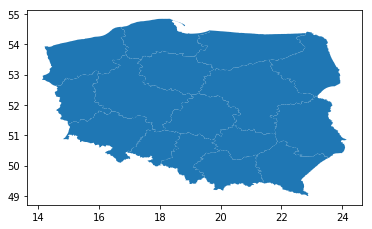

In [6]:
map_df.plot()

In [16]:
a = [[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]]
df_woj = np.array(a).reshape(16,2)
df_woj = pd.DataFrame(df_woj)

In [19]:
merged = map_df.join(df_woj)
merged['j'] = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
merged['k'] = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]).astype('int')

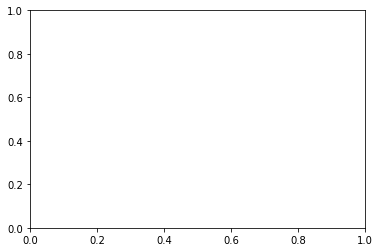

In [33]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'j'
# set the range for the choropleth
vmin, vmax = 1,16
# create figure and axes for Matplotlib
fig, ax = plt.subplots()

In [72]:
merged["rep"] = merged["geometry"].representative_point()
map_points = merged.copy()
map_points.plot(column='j', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
map_points.set_geometry("rep", inplace = True)

sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
#map_points.plot(column = )
texts = []
for x, y, label in zip(map_points.geometry.x, map_points.geometry.y, map_points["JPT_NAZWA_"]):
    texts.append(plt.text(x, y, label, fontsize = 8))

In [32]:
fig

[]

In [13]:
merged["center"] = merged["geometry"].centroid
merged_c = merged.copy()
merged.set_geometry("center", inplace = True)

AttributeError: 'ScalarMappable' object has no attribute 'pop'

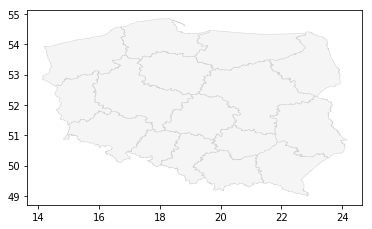

In [64]:
merged.plot(color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5)
texts = []


    

In [ ]:
import pysal
import rtree  
from shapely.geometry import Point
from shapely.geometry import Polygon
attributes = {'Total households':'F996','Household is deprived in 4 dimensions':'F1001'}
print ( sourceDataFile + " has " + str(len(sourceTable)) + " records" )
sourceTable['area'] = sourceTable['geometry'].area / 10**6 # area in km squared
for attribute in attributes:
    sourceTable[attributes[attribute] + '_density'] = sourceTable[attributes[attribute]] / sourceTable['area']
sourceTable['district'] = sourceTable['name'].str.split(" ").str[0] 
districts = sourceTable['district'].unique()
plotNum = 1
for district in districts:
    # get data for this district only
    districtTable = sourceTable[sourceTable['district'] == district]
    print ( str(len(districtTable)) + " MSOAs in " + district )
    # get places in this district only using a GeoPandas spatial join
    placesInDistrict = gpd.sjoin(placeTable, districtTable, how='inner', op="within")
    # the join returns all columns in both tables, so trim down...
    placesInDistrict = placesInDistrict[['NAME1','TYPE','LOCAL_TYPE','geometry']]
    print ( str(len(placesInDistrict)) + " places in " + district )
    for attribute in attributes:    
        myMap = districtTable.plot(column=attributes[attribute] + '_density',cmap='Reds',scheme='fisher_jenks',edgecolor='black') 
        placesInDistrict.plot(ax=myMap, marker='o', color='blue', markersize=16) # add places layer to myMap
        # add labels to places
        for place in placesInDistrict.itertuples(index=True, name='Pandas'):
            plt.text(place.geometry.x + 300, place.geometry.y, place.NAME1,  bbox=dict(boxstyle='square,pad=0.1', fc='white', ec='none')) # 300m x offset added.
        title = attribute + " in " + district
        plt.title(title)
        plt.figure(plotNum)
        plt.savefig(sourceDataPath + title + ".png")
        plotNum += 1
plt.show() # NB: call this just once